In [1]:
import sys
print(sys.version)
print(sys.path)

3.7.1 | packaged by conda-forge | (default, Mar 13 2019, 13:32:59) [MSC v.1900 64 bit (AMD64)]
['D:\\michele\\jennifer', 'D:\\michele\\miniconda3\\envs\\prediction\\python37.zip', 'D:\\michele\\miniconda3\\envs\\prediction\\DLLs', 'D:\\michele\\miniconda3\\envs\\prediction\\lib', 'D:\\michele\\miniconda3\\envs\\prediction', '', 'D:\\michele\\miniconda3\\envs\\prediction\\lib\\site-packages', 'D:\\michele\\miniconda3\\envs\\prediction\\lib\\site-packages\\xgboost-0.83.dev0-py3.7.egg', 'D:\\michele\\miniconda3\\envs\\prediction\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\mtinti\\.ipython']


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msn
from scipy import stats
from scipy.spatial import distance
import re
from sklearn import cluster
from sklearn.metrics import  silhouette_score
import matplotlib
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.stats.multitest as smm
from sklearn.decomposition import PCA
import seaborn as sns
from statsmodels.sandbox.stats.multicomp import multipletests
plt.style.use('ggplot')
from scipy.stats import ttest_ind
#from plotly.widgets import GraphWidget
from adjustText import adjust_text
import warnings
warnings.filterwarnings("ignore")

from ipywidgets import widgets
from IPython.display import display
from plotly.widgets import GraphWidget
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.plotly as py
from plotly import tools
init_notebook_mode(connected=True)
import os

<IPython.core.display.Javascript object>

In [10]:
path = 'D:/michele/jennifer/indata/Hypothalamus/combined_ipi/txt/'
df = pd.read_table(path+'proteinGroups.txt')
df.head()
print(df.shape)
df = df[df['Only identified by site']!='+']
df = df[df['Potential contaminant']!='+']
df = df[df['Reverse']!='+']
hippo_cols = ['Reporter intensity corrected {} Hypothalamus'.format(n) for n in range(1,11)]
hippo_df=df[hippo_cols+['Protein IDs']]
hippo_df.columns = ['ND_1','ND_2','ND_3','HF_1','HF_2','HF_3','KO_1','KO_2','KO_3','null', 'Fasta headers']
del hippo_df['null']
hippo_df['Protein IDs']=[n.split(';')[0].split(' ')[0].split('|')[2] for n in df['Fasta headers']]
del hippo_df['Fasta headers']
hippo_df.head()
hippo_df=hippo_df.replace(0,np.nan)
#print(hippo_df.shape)
hippo_df = hippo_df.dropna()
#print(hippo_df.shape)
#hippo_df=hippo_df.fillna(hippo_df.mean())
hippo_df.to_csv('Hypothalamus_export.csv',sep='\t',index=False)

(7719, 124)


In [11]:
hippo_df.head()
hippo_df[hippo_df['Protein IDs'].isin(['E41L1_MOUSE'])]

,ND_1,ND_2,ND_3,HF_1,HF_2,HF_3,KO_1,KO_2,KO_3,Protein IDs
6775,55877.0,58881.0,47236.0,56419.0,52416.0,63847.0,606110.0,366010.0,433220.0,E41L1_MOUSE


(7719, 124)


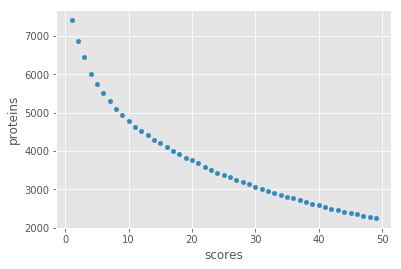

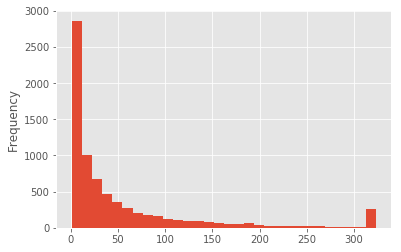

In [97]:
path = 'D:/michele/jennifer/indata/Hypothalamus/combined_ipi/txt/'
#for l in os.listdir(path):
#    print (l)
df = pd.read_table(path+'proteinGroups.txt')
df.head()
print(df.shape)
df = df[df['Only identified by site']!='+']
df = df[df['Potential contaminant']!='+']
df = df[df['Reverse']!='+']

scores = []
proteins = []
for n in range(1,50):
    scores.append(n)
    proteins.append(df[df['Score']>n].shape[0])
score_t = pd.DataFrame() 
score_t['scores']=scores
score_t['proteins']=proteins
score_t.plot(x='scores',y='proteins',kind='scatter')
plt.show()
df['Score'].plot(kind='hist',bins=30)

In [98]:
df=df[df['Score']>2]
df['unique']=[ n.split(';')[0] for n in df['Peptide counts (unique)'] ]
df['unique'] = df['unique'].astype(int)
df = df[df['unique']>=2]
print(df.shape)
df.head().columns[0:30]

(5871, 125)


Index(['Protein IDs', 'Majority protein IDs', 'Peptide counts (all)',
       'Peptide counts (razor+unique)', 'Peptide counts (unique)',
       'Fasta headers', 'Number of proteins', 'Peptides',
       'Razor + unique peptides', 'Unique peptides', 'Peptides Hypothalamus',
       'Razor + unique peptides Hypothalamus', 'Unique peptides Hypothalamus',
       'Sequence coverage [%]', 'Unique + razor sequence coverage [%]',
       'Unique sequence coverage [%]', 'Mol. weight [kDa]', 'Sequence length',
       'Sequence lengths', 'Fraction average', 'Fraction 1', 'Fraction 2',
       'Fraction 3', 'Fraction 4', 'Fraction 5', 'Fraction 6', 'Fraction 7',
       'Fraction 8', 'Fraction 9', 'Fraction 10'],
      dtype='object')

In [99]:
hippo_cols = ['Reporter intensity corrected {} Hypothalamus'.format(n) for n in range(1,11)]
hippo_df=df[hippo_cols]
hippo_df.head(10)

,Reporter intensity corrected 1 Hypothalamus,Reporter intensity corrected 2 Hypothalamus,Reporter intensity corrected 3 Hypothalamus,Reporter intensity corrected 4 Hypothalamus,Reporter intensity corrected 5 Hypothalamus,Reporter intensity corrected 6 Hypothalamus,Reporter intensity corrected 7 Hypothalamus,Reporter intensity corrected 8 Hypothalamus,Reporter intensity corrected 9 Hypothalamus,Reporter intensity corrected 10 Hypothalamus
145,17337.0,17854.0,15194.0,14568.0,10197.0,17639.0,24198.0,15684.0,19584.0,6446.0
146,528110.0,538980.0,451470.0,428220.0,416790.0,505980.0,805400.0,483620.0,591570.0,237670.0
147,296380.0,319230.0,264040.0,247620.0,164990.0,301000.0,463390.0,293720.0,345080.0,124010.0
148,7623.7,8644.8,7007.2,6378.0,4035.8,7605.4,12413.0,6262.6,8306.6,3587.9
149,503080.0,528300.0,427180.0,429350.0,508440.0,504430.0,744060.0,465770.0,559230.0,256750.0
150,111100.0,112010.0,99685.0,110620.0,98225.0,114920.0,164180.0,100140.0,125030.0,49148.0
152,20932.0,21140.0,19975.0,17731.0,11854.0,20952.0,33553.0,19225.0,22307.0,8140.7
153,30390.0,28670.0,28617.0,30818.0,19586.0,30996.0,39022.0,24002.0,34337.0,13870.0
154,39635.0,41861.0,36916.0,35849.0,32323.0,42592.0,58279.0,39749.0,46380.0,18378.0
157,49536.0,51530.0,41425.0,37360.0,24033.0,48426.0,74273.0,49588.0,57130.0,18484.0


In [100]:
hippo_df = hippo_df.replace(0, np.nan)
hippo_df.dropna(how='all', axis=0,inplace=True)
#hippo_df.head(10)

In [101]:
hippo_df.columns = ['ND_1','ND_2','ND_3','HF_1','HF_2','HF_3','KO_1','KO_2','KO_3','null']
del hippo_df['null']
#hippo_df.head(10)

In [102]:
#np.log2(hippo_df).describe()

In [103]:
#np.log2(hippo_df).plot(kind='box')

In [104]:
#np.log2(hippo_df).plot(kind='kde')

In [105]:
col_sum = hippo_df.sum(axis=0)
target = np.mean(col_sum)
norm_facs = target / col_sum
norm_facs

ND_1    1.024594
ND_2    1.029756
ND_3    1.147146
HF_1    1.116070
HF_2    0.972111
HF_3    1.020823
KO_1    0.721777
KO_2    1.189151
KO_3    0.951950
dtype: float64

## Values Distributions

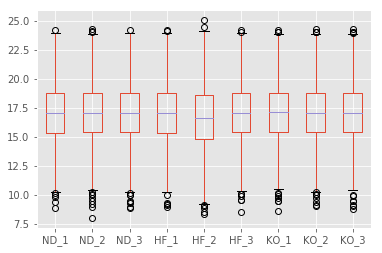

In [106]:
hippo_df = hippo_df.multiply(norm_facs,axis=1)
np.log2(hippo_df).plot(kind='box')

In [107]:
def make_pca(in_df):
    cols = in_df.columns
    pca = PCA(n_components=2)
    pca.fit(in_df)
    temp_df = pd.DataFrame()
    temp_df['pc_1']=pca.components_[0]
    temp_df['pc_2']=pca.components_[1]
    temp_df.index = cols
    print(pca.explained_variance_ratio_)
    fig,ax=plt.subplots()
    temp_df.iloc[0:3,:].plot(kind='scatter',x='pc_1',y='pc_2',s=50, c='g', ax=ax,legend ='ND')
    temp_df.iloc[3:6,:].plot(kind='scatter',x='pc_1',y='pc_2',s=50, c='b', ax=ax, legend='HF')    
    temp_df.iloc[6:9,:].plot(kind='scatter',x='pc_1',y='pc_2',s=50, c='r', ax=ax, legend='KO')
    for i, txt in enumerate(cols):
        ax.annotate(txt, (temp_df['pc_1'].values[i]+0.0003,temp_df['pc_2'].values[i]))
    #ax.set_xlabel('PC1({})'.format(round(pca.explained_variance_ratio_[0],2)))
    #ax.set_ylabel('PC2({})'.format(round(pca.explained_variance_ratio_[1],2)))
    #ax.set_xlim(0.345,0.360)
    ax.set_xlabel('PC1_{:.3f}'.format(pca.explained_variance_ratio_[0]))
    ax.set_ylabel('PC2_{:.3f}'.format(pca.explained_variance_ratio_[1]))
    
    ax.yaxis.label.set_size(12)
    ax.xaxis.label.set_size(12)
    #plt.tick_params(axis='both', which='major', labelsize=16, rotation=70, horizontalalignment='right' )
    #plt.setp( axs[1].xaxis.get_majorticklabels(), )
    if not os.path.exists(path+'figs'):  
        os.makedirs(path+'figs')
    fig.savefig(path+'figs/pca.svg')
    fig.savefig(path+'figs/pca.png')
    fig.savefig(path+'figs/pca.pdf')
    plt.legend()
    plt.show()

## PCA plot

[0.99082647 0.00537996]


No handles with labels found to put in legend.


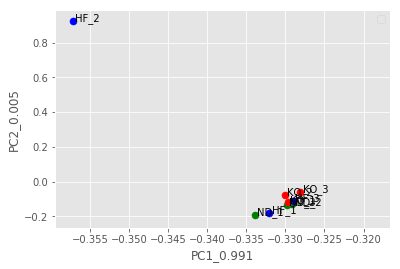

In [108]:
hippo_df=hippo_df.fillna(0)
make_pca(np.log1p(hippo_df))

In [109]:
#hippo_df = np.log2(hippo_df)

In [110]:

onesample_results = ttest_ind(hippo_df[['ND_1','ND_2','ND_3']].T, 
                              hippo_df[['KO_1','KO_2','KO_3']].T)

#print(onesample_results)
hippo_df['ND_KO_pvalue']=onesample_results.pvalue
hippo_df['ND_KO_pvalue_corr']=multipletests(onesample_results.pvalue,method='bonferroni')[1]

onesample_results = ttest_ind(hippo_df[['HF_1','HF_2','HF_3']].T, 
                              hippo_df[['KO_1','KO_2','KO_3']].T)
#print(onesample_results)
hippo_df['HF_KO_pvalue']=onesample_results.pvalue
hippo_df['HF_KO_pvalue_corr']=multipletests(onesample_results.pvalue,method='bonferroni')[1]

onesample_results = ttest_ind(hippo_df[['HF_1','HF_2','HF_3']].T, 
                              hippo_df[['ND_1','ND_2','ND_3']].T)
#print(onesample_results)
hippo_df['HF_ND_pvalue']=onesample_results.pvalue
hippo_df['HF_ND_pvalue_corr']=multipletests(onesample_results.pvalue,method='bonferroni')[1]


hippo_df['log10_ND_KO_pvalue']=-np.log10(hippo_df['ND_KO_pvalue'])
hippo_df['log10_HF_KO_pvalue']=-np.log10(hippo_df['HF_KO_pvalue'])
hippo_df['log10_HF_ND_pvalue']=-np.log10(hippo_df['HF_ND_pvalue'])
hippo_df.head()

,ND_1,ND_2,ND_3,HF_1,HF_2,HF_3,KO_1,KO_2,KO_3,ND_KO_pvalue,ND_KO_pvalue_corr,HF_KO_pvalue,HF_KO_pvalue_corr,HF_ND_pvalue,HF_ND_pvalue_corr,log10_ND_KO_pvalue,log10_HF_KO_pvalue,log10_HF_ND_pvalue
145,17763.394485,18385.265784,17429.740559,16258.903718,9912.620442,18006.289068,17465.571136,18650.648957,18642.988903,0.460991,1.0,0.229616,1.0,0.274175,1.0,0.336308,0.638997,0.561972
146,541098.590380,555017.954087,517902.130463,477923.376579,405166.330706,516515.796949,581319.571581,575097.350720,563145.064615,0.043446,1.0,0.032147,1.0,0.106250,1.0,1.362052,1.492859,0.973669
147,303669.311729,328729.046501,302892.503439,276361.184691,160388.667922,307267.589394,334464.460237,349277.519237,328498.907817,0.070913,1.0,0.118665,1.0,0.233801,1.0,1.149272,0.925678,0.631154
148,7811.200931,8902.035715,8038.283404,7118.292690,3923.247385,7763.763868,8959.423693,7447.178919,7907.467914,0.806554,1.0,0.221401,1.0,0.183199,1.0,0.093367,0.654820,0.737076
149,515452.990567,544020.158715,490037.947352,479184.535366,494260.344980,514933.521987,537045.741781,553871.000051,532359.001445,0.219489,1.0,0.021370,1.0,0.337576,1.0,0.658586,1.670194,0.471628


In [111]:
#for visualization later
hippo_df['mean_ND'] = hippo_df[['ND_1','ND_2','ND_3']].median(axis=1)
hippo_df['mean_HF'] = hippo_df[['HF_1','HF_2','HF_3']].median(axis=1)
hippo_df['mean_KO'] = hippo_df[['KO_1','KO_2','KO_3']].median(axis=1)

hippo_df['log2_fc_HF_ND'] = np.log2(hippo_df['mean_HF']/hippo_df['mean_ND'])
hippo_df['log2_fc_ND_KO'] = np.log2(hippo_df['mean_ND']/hippo_df['mean_KO'])
hippo_df['log2_fc_HF_KO'] = np.log2(hippo_df['mean_HF']/hippo_df['mean_KO'])
hippo_df['desc']=[df.loc[i]['Fasta headers'].split('|')[2].split(';')[0].split(' ')[0] for i in hippo_df.index.values]
hippo_df.to_csv('Hypothalamus_table.csv')

## p-values distridibutions

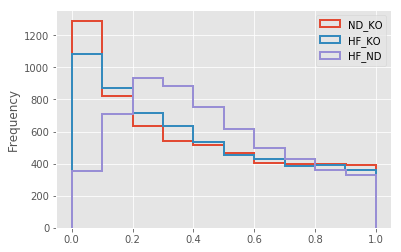

In [112]:
hippo_df['ND_KO_pvalue'].plot(kind='hist',bins=10,histtype='step',label='ND_KO',linewidth=2)
hippo_df['HF_KO_pvalue'].plot(kind='hist',bins=10,histtype='step',label='HF_KO',linewidth=2)
hippo_df['HF_ND_pvalue'].plot(kind='hist',bins=10,histtype='step',label='HF_ND',linewidth=2)
plt.legend()
plt.show()

bace_index 1417


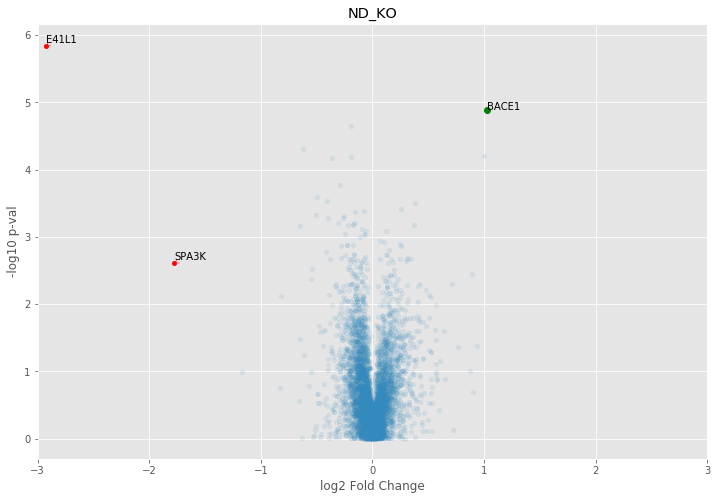

763     sp|P07759|SPA3K_MOUSE Serine protease inhibito...
6775    sp|Q9Z2H5|E41L1_MOUSE Band 4.1-like protein 1 ...
Name: Fasta headers, dtype: object


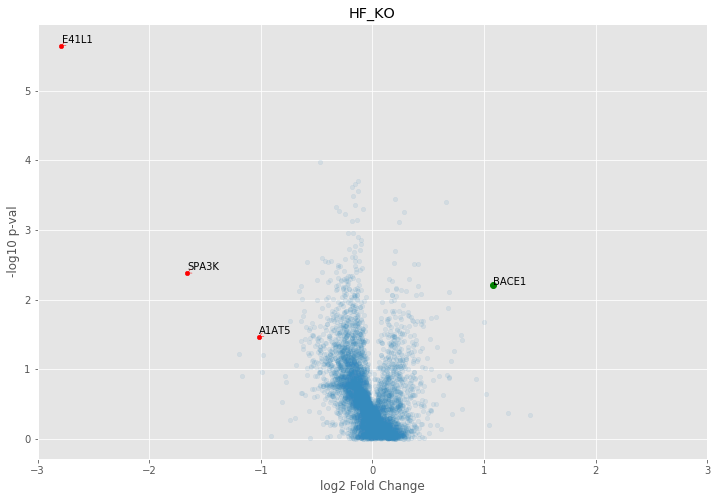

763     sp|P07759|SPA3K_MOUSE Serine protease inhibito...
1899    sp|Q00898|A1AT5_MOUSE Alpha-1-antitrypsin 1-5 ...
6775    sp|Q9Z2H5|E41L1_MOUSE Band 4.1-like protein 1 ...
Name: Fasta headers, dtype: object


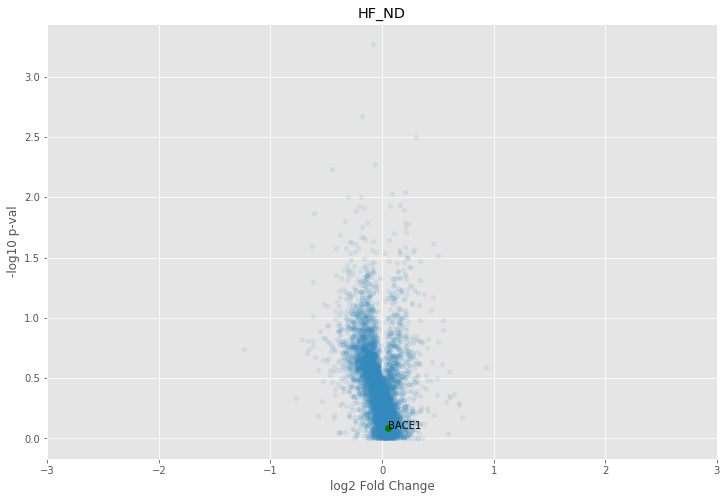

Series([], Name: Fasta headers, dtype: object)


In [113]:
def find_sprot(index, series, sprot_id):
    for index,n in zip(index, series):
        if sprot_id in n:
            return index
    return -1

bace_index = find_sprot(df.index.values, df['Fasta headers'],'P56818')
print('bace_index', bace_index)
tag = 'ND_KO'


def make_fig(indf=pd.DataFrame(), 
             bace_index=int, 
             tag='', 
             fasta=pd.Series(),
             path_figure='../'):

    fig, ax=plt.subplots(figsize=(12,8))
    indf.plot(kind='scatter',
             x='log2_fc_{}'.format(tag),
             y='log10_{}_pvalue'.format(tag), 
             ax=ax, alpha=0.1)

    selection = indf[(indf['{}_pvalue'.format(tag)]<0.05) & 
         ((indf['log2_fc_{}'.format(tag)]<-1) | (indf['log2_fc_{}'.format(tag)]>1))]
    
    selection = selection.loc[~selection.index.isin([bace_index])]
    if  selection.shape[0]>0:
        selection.plot(kind='scatter',
             x='log2_fc_{}'.format(tag),
             y='log10_{}_pvalue'.format(tag), 
             ax=ax, c='r')
        texts = [plt.text(selection.loc[i]['log2_fc_{}'.format(tag)], 
                  selection.loc[i]['log10_{}_pvalue'.format(tag)], 
                  fasta.loc[i].split('|')[2].split(';')[0].split(' ')[0].split('_')[0]) for i in selection.index.values]
        adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
        

    if bace_index != -1:

        ax.plot(hippo_df.loc[bace_index]['log2_fc_{}'.format(tag)],
            hippo_df.loc[bace_index]['log10_{}_pvalue'.format(tag)],marker='o', c='g')

        plt.text(hippo_df.loc[bace_index]['log2_fc_{}'.format(tag)],
             hippo_df.loc[bace_index]['log10_{}_pvalue'.format(tag)],
            'BACE1')

    plt.xlabel('log2 Fold Change')
    plt.ylabel('-log10 p-val')
    plt.title(tag)
    plt.xlim(-3,3)
    

    fig.savefig('{}vulcano_{}.svg'.format(path_figure,tag))
    fig.savefig('{}vulcano_{}.png'.format(path_figure,tag))
    fig.savefig('{}vulcano_{}.pdf'.format(path_figure,tag))
    plt.show()
    genes = df.loc[selection.index.values]['Fasta headers']
    print(genes)
    

make_fig(hippo_df,  bace_index, 'ND_KO',  df['Fasta headers'], path+'figs/')
make_fig(hippo_df,  bace_index, 'HF_KO',  df['Fasta headers'], path+'figs/')
make_fig(hippo_df,  bace_index, 'HF_ND',  df['Fasta headers'], path+'figs/')

In [114]:

#interactive plot
trace_1 = go.Scatter(
    x=hippo_df['log2_fc_{}'.format(tag)],
    y=hippo_df['log10_{}_pvalue'.format(tag)],
    mode='markers',
    name='MA Plot',
    text = [df.loc[i]['Fasta headers'].split('|')[2].split(';')[0].split(' ')[0] for i in hippo_df.index.values],
    hoverinfo = 'text',
    marker=dict(
        #size=16,
        color = hippo_df['log10_{}_pvalue'.format(tag)], #set color equal to a variable
        colorscale='Bluered',
        showscale=True
    )
)


annot_1 = go.Scatter(
    x=[hippo_df.loc[bace_index]['log2_fc_{}'.format(tag)]],
    y=[hippo_df.loc[bace_index]['log10_{}_pvalue'.format(tag)]],
    mode='markers+text',
    name='BACE1',
    text=['BACE1'],
    textposition='bottom center'
)
layout = dict(title=tag,
             width=800,
             height=800,
              
             )

fig = go.Figure(data=[trace_1,annot_1], 
                layout=layout)
iplot(fig, filename='test')

In [115]:
#significant after
#bonferroni correction
df.loc[hippo_df[hippo_df['ND_KO_pvalue_corr']<0.05].index.values]

,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Fasta headers,Number of proteins,Peptides,Razor + unique peptides,Unique peptides,...,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Phospho (STY) site IDs,Oxidation (M) site positions,Phospho (STY) site positions,unique
6775,sp|Q9Z2H5|E41L1_MOUSE;tr|A0A2R8VHB6|A0A2R8VHB6...,sp|Q9Z2H5|E41L1_MOUSE,44;8,5;0,5;0,sp|Q9Z2H5|E41L1_MOUSE Band 4.1-like protein 1 ...,2,44,5,5,...,False;False;True;False;True;False;False;True;F...,1051;1944;1945;4075;8255;9162;9163;10172;11757...,2543;2544;4473;4474;4475;4476;4477;4478;8801;8...,2857;2858;5021;5022;5023;5024;5025;5026;5027;9...,2857;5023;9939;19781;22012;24369;28130;28889;2...,2343;2344;2345;2346;2347;2348;2349,1957;1958;1959;1960;1961;1962;1963;1964;1965;2...,63;264;389;688;699;734;767,378;430;475;510;639;648;650;652;677;684;685;868,5


In [22]:

#interactive plot
trace_1 = go.Scatter(
    x=hippo_df['log2_fc_{}'.format(tag)],
    y=hippo_df['log10_{}_pvalue'.format(tag)],
    mode='markers',
    name='MA Plot',
    text = [df.loc[i]['Fasta headers'].split('|')[2].split(';')[0].split(' ')[0] for i in hippo_df.index.values],
    hoverinfo = 'text',
    marker=dict(
        #size=16,
        color = hippo_df['log10_{}_pvalue'.format(tag)], #set color equal to a variable
        colorscale='Bluered',
        showscale=True
    )
)


annot_1 = go.Scatter(
    x=[hippo_df.loc[bace_index]['log2_fc_{}'.format(tag)]],
    y=[hippo_df.loc[bace_index]['log10_{}_pvalue'.format(tag)]],
    mode='markers+text',
    name='BACE1',
    text=['BACE1'],
    textposition='bottom center'
)
layout = dict(title=tag,
             width=800,
             height=800,
              
             )

fig = go.Figure(data=[trace_1,annot_1], 
                layout=layout)
iplot(fig, filename='test')

In [23]:
#significant
#bonferroni correction
#df.loc[hippo_df[hippo_df['HF_KO_pvalue_corr']<0.05].index.values]

,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Fasta headers,Number of proteins,Peptides,Razor + unique peptides,Unique peptides,...,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Phospho (STY) site IDs,Oxidation (M) site positions,Phospho (STY) site positions,unique
6775,sp|Q9Z2H5|E41L1_MOUSE;tr|A0A2R8VHB6|A0A2R8VHB6...,sp|Q9Z2H5|E41L1_MOUSE,44;8,5;0,5;0,sp|Q9Z2H5|E41L1_MOUSE Band 4.1-like protein 1 ...,2,44,5,5,...,False;False;True;False;True;False;False;True;F...,1051;1944;1945;4075;8255;9162;9163;10172;11757...,2543;2544;4473;4474;4475;4476;4477;4478;8801;8...,2857;2858;5021;5022;5023;5024;5025;5026;5027;9...,2857;5023;9939;19781;22012;24369;28130;28889;2...,2343;2344;2345;2346;2347;2348;2349,1957;1958;1959;1960;1961;1962;1963;1964;1965;2...,63;264;389;688;699;734;767,378;430;475;510;639;648;650;652;677;684;685;868,5


In [25]:
#significant after
#bonferroni correction
#df.loc[hippo_df[hippo_df['HF_ND_pvalue_corr']<0.05].index.values]

,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Fasta headers,Number of proteins,Peptides,Razor + unique peptides,Unique peptides,...,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Phospho (STY) site IDs,Oxidation (M) site positions,Phospho (STY) site positions,unique


In [119]:
hippo_df = hippo_df.join(df['Protein IDs'],how='left')
hippo_df.to_csv(path+'Hypothalamus.csv')

In [120]:
def find_prot(inlist, prot='Q3UGC7'):
    out = []
    for p,n in enumerate(inlist):
        if prot in n:
            out.append(p)
    return out

In [121]:
cols = ['Reporter intensity corrected {}'.format(n) for n in range(1,10)]
df = pd.read_table(path+'peptides.txt')
df = df[df['Reverse']!='+']
df = df[df['Potential contaminant']!='+']



count    5.869200e+04
mean     7.391797e-03
std      3.830754e-02
min      0.000000e+00
25%      1.734450e-08
50%      1.175400e-04
75%      3.851625e-03
max      1.000000e+00
Name: PEP, dtype: float64

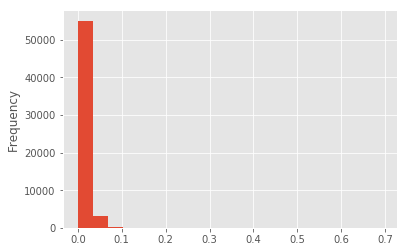

In [122]:
np.log1p(df['PEP']).plot(kind='hist',bins=20)
df['PEP'].describe()

In [123]:
df['Score'].describe()

count    58616.000000
mean       137.393023
std         59.108114
min         21.411000
25%         96.964000
50%        125.970000
75%        164.650000
max        573.710000
Name: Score, dtype: float64

In [124]:
df = df[df['PEP']<3.851625e-03]
df = df[df['Score']>100]
#df['Localization prob'].plot(kind='hist')
#plt.show()
#df['Delta score'].plot(kind='hist')
#df = df[df['Localization prob']>0.75]
#df = df[df['Localization prob']>0.75]
print(df.shape)
df.head()

(37521, 143)


,Sequence,N-term cleavage window,C-term cleavage window,Amino acid before,First amino acid,Second amino acid,Second last amino acid,Last amino acid,Amino acid after,A Count,...,Potential contaminant,id,Protein group IDs,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Phospho (STY) site IDs,MS/MS Count
4,AAAAAAGPEMVR,______________________________,______________________________,M,A,A,V,R,G,6,...,NaN,4,1657,4;5,7;8;9;10;11,7;8;9;10;11,9.0,922,NaN,5
6,AAAAAASHLNLDALR,______________________________,AAAAAASHLNLDALREVLECPICMESFTEE,M,A,A,L,R,E,7,...,NaN,6,4184,7,15,15,15.0,NaN,NaN,1
7,AAAAAGPASSQR,______________________________,______________________________,M,A,A,Q,R,L,6,...,NaN,7,5543,8,16;17;18,16;17;18,17.0,NaN,NaN,3
8,AAAAAMAEQEGAR,______________________________,______________________________,M,A,A,A,R,N,7,...,NaN,8,5721,9,19;20;21,19;20;21,20.0,NaN,NaN,3
10,AAAAASGAGGVAVAGAGGAGPAGR,______________________________,GVAVAGAGGAGPAGRLLPPPAAGPPAAPAA,M,A,A,G,R,L,11,...,NaN,10,7253,11,23;24;25;26;27,23;24;25;26;27,24.0,NaN,NaN,5


(37521, 9)
(36645, 9)


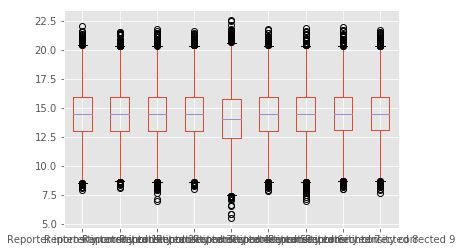

In [125]:
temp = df[cols]
print(temp.shape)
temp.replace(0,np.nan,inplace=True)
temp.dropna(how='all', axis=0,inplace=True)
print(temp.shape)
col_sum = temp.sum(axis=0)
target = np.mean(col_sum)
norm_facs = target / col_sum
temp = temp.multiply(norm_facs,axis=1)
np.log2(temp).plot(kind='box')

In [126]:
onesample_results = ttest_ind(temp[[cols[0],cols[1],cols[2]]].T, 
                              temp[[cols[6],cols[7],cols[8]]].T)
#print(onesample_results)
temp['ND_KO_pvalue']=onesample_results.pvalue
temp['ND_KO_pvalue_corr']=multipletests(onesample_results.pvalue,method='s')[1]
temp['log10_ND_KO_pvalue']=-np.log10(temp['ND_KO_pvalue'])
temp['ND_KO_fc']=np.log2(temp[[cols[0],cols[1],cols[2]]].mean(axis=1)/temp[[cols[6],cols[7],cols[8]]].mean(axis=1))

In [127]:
temp = temp.join(df['PEP'],how='left')
temp = temp.join(df['Proteins'],how='left')
temp = temp.join(df['Sequence'],how='left')
#temp.sort_values('ND_KO_pvalue').head(20)

In [128]:
temp[(temp['ND_KO_fc']>2)|(temp['ND_KO_fc']<-2)].sort_values('ND_KO_pvalue').head(10)

,Reporter intensity corrected 1,Reporter intensity corrected 2,Reporter intensity corrected 3,Reporter intensity corrected 4,Reporter intensity corrected 5,Reporter intensity corrected 6,Reporter intensity corrected 7,Reporter intensity corrected 8,Reporter intensity corrected 9,ND_KO_pvalue,ND_KO_pvalue_corr,log10_ND_KO_pvalue,ND_KO_fc,PEP,Proteins,Sequence
3858,8518.384606,8545.776469,8492.331227,9248.596307,1235.047489,8058.903365,1029.314543,964.633320,526.517797,0.000001,0.039193,5.962158,3.341928,6.189600e-16,tr|A2AUK5|A2AUK5_MOUSE;tr|A2AUK8|A2AUK8_MOUSE,APESDTGDEDQDQERDAVFLK
23413,14369.501342,16550.209235,15069.717162,15132.149050,19485.636521,14867.158619,149075.633996,160202.014192,157293.142259,0.000002,0.072389,5.688127,-3.342722,1.725500e-07,sp|Q9JKR6|HYOU1_MOUSE,GQAGPEGAAPAPEEDKK
3856,40593.068737,36451.642797,31681.787415,36448.162386,35323.658120,40767.163296,197678.137232,204380.053078,211171.458866,0.000004,0.121901,5.450085,-2.495724,5.633600e-102,sp|Q9Z2H5|E41L1_MOUSE,APESDMGDEDQDQER
3857,59347.585650,60150.101034,64509.748136,64241.135190,48758.716378,61838.509430,7246.270268,7456.861966,7193.529572,0.000005,0.156723,5.332393,3.070981,2.385400e-71,tr|A2AUK5|A2AUK5_MOUSE;tr|A2AUK8|A2AUK8_MOUSE,APESDTGDEDQDQER
54844,31207.054671,31803.170343,33188.644628,41289.783956,18953.045938,36348.302018,3794.711659,6186.355926,4532.961104,0.000008,0.246563,5.112062,2.728572,8.460000e-05,sp|Q9WTQ5|AKA12_MOUSE,VKEDSQVPATQTLQR
11400,45372.601800,42327.353161,48298.437780,42443.291136,7617.015447,40009.907004,4802.624327,6668.785832,5443.695618,0.000026,0.607312,4.593330,3.007205,8.558900e-09,tr|A2AUK5|A2AUK5_MOUSE;tr|A2AUK8|A2AUK8_MOUSE;...,DYFGLTYCDADSQK
45313,44516.612150,38225.578132,41629.793091,44769.179050,3883.933803,46725.063677,5929.042652,4634.760259,5082.955064,0.000041,0.774708,4.390733,2.990726,5.098700e-24,tr|A2AUK5|A2AUK5_MOUSE;tr|A2AUK8|A2AUK8_MOUSE,SDSETEGLVFAR
30309,12997.445730,16173.389541,13322.404011,12705.232115,24155.747753,14302.026730,70621.129107,77884.952744,81841.647461,0.000053,0.858625,4.272582,-2.438508,1.418900e-29,sp|Q922R8|PDIA6_MOUSE,LAAVDATVNQVLASR
8685,44473.349135,52629.150586,54363.652567,58452.505319,8588.677975,56343.547106,4835.160962,5630.256219,3856.323172,0.000122,0.988487,3.914286,3.402717,3.078900e-13,tr|A2AUK5|A2AUK5_MOUSE;tr|A2AUK8|A2AUK8_MOUSE,DKSDSETEGLVFAR
5237,127667.096511,109524.806121,134987.383654,142650.757994,85385.232700,120476.308055,7771.917692,6758.906171,12893.363334,0.000124,0.989258,3.907595,3.762477,1.468500e-03,sp|Q9WTQ5|AKA12_MOUSE,ATTCQVIK


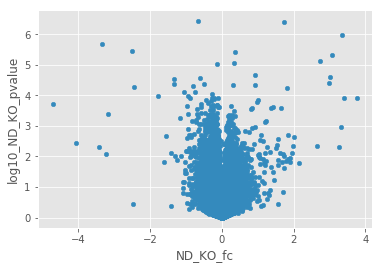

In [129]:
temp.plot(kind='scatter',x='ND_KO_fc',y='log10_ND_KO_pvalue')

In [130]:
temp.iloc[find_prot(temp['Proteins'], prot='A2AUK5')]

,Reporter intensity corrected 1,Reporter intensity corrected 2,Reporter intensity corrected 3,Reporter intensity corrected 4,Reporter intensity corrected 5,Reporter intensity corrected 6,Reporter intensity corrected 7,Reporter intensity corrected 8,Reporter intensity corrected 9,ND_KO_pvalue,ND_KO_pvalue_corr,log10_ND_KO_pvalue,ND_KO_fc,PEP,Proteins,Sequence
1830,61964.998045,65926.973446,69142.532547,67814.898051,55036.300463,66263.502338,69796.144635,76005.061559,71979.948882,0.066339,1.000000,1.178231,-0.144431,1.113100e-24,sp|Q9Z2H5|E41L1_MOUSE;tr|A2AUK5|A2AUK5_MOUSE;t...,AETMTVSSLAIR
3857,59347.585650,60150.101034,64509.748136,64241.135190,48758.716378,61838.509430,7246.270268,7456.861966,7193.529572,0.000005,0.156723,5.332393,3.070981,2.385400e-71,tr|A2AUK5|A2AUK5_MOUSE;tr|A2AUK8|A2AUK8_MOUSE,APESDTGDEDQDQER
3858,8518.384606,8545.776469,8492.331227,9248.596307,1235.047489,8058.903365,1029.314543,964.633320,526.517797,0.000001,0.039193,5.962158,3.341928,6.189600e-16,tr|A2AUK5|A2AUK5_MOUSE;tr|A2AUK8|A2AUK8_MOUSE,APESDTGDEDQDQERDAVFLK
7823,55673.319608,51905.368496,61817.786655,55311.723979,59582.237570,54453.983160,60903.520605,61143.550204,57839.147183,0.319457,1.000000,0.495588,-0.086681,1.272400e-51,sp|Q9Z2H5|E41L1_MOUSE;tr|A2AUK5|A2AUK5_MOUSE;t...,DFMTTPPCITTETISTTMENSLK
8685,44473.349135,52629.150586,54363.652567,58452.505319,8588.677975,56343.547106,4835.160962,5630.256219,3856.323172,0.000122,0.988487,3.914286,3.402717,3.078900e-13,tr|A2AUK5|A2AUK5_MOUSE;tr|A2AUK8|A2AUK8_MOUSE,DKSDSETEGLVFAR
11126,14969.003118,23245.450955,20315.091702,18732.556928,33849.090386,14728.175008,18792.437691,22553.925951,18896.838606,0.843943,1.000000,0.073687,-0.041633,1.567800e-58,sp|Q9Z2H5|E41L1_MOUSE;tr|A2AUK5|A2AUK5_MOUSE;t...,DVLTSTYGATAETLSTSTTTHVTK
11400,45372.601800,42327.353161,48298.437780,42443.291136,7617.015447,40009.907004,4802.624327,6668.785832,5443.695618,0.000026,0.607312,4.593330,3.007205,8.558900e-09,tr|A2AUK5|A2AUK5_MOUSE;tr|A2AUK8|A2AUK8_MOUSE;...,DYFGLTYCDADSQK
11495,63741.871867,52715.633794,57301.795128,56673.950456,22436.712210,63363.241397,69509.099205,57524.431854,60380.577211,0.399000,1.000000,0.399027,-0.109139,2.547700e-05,sp|Q9Z2H5|E41L1_MOUSE;tr|A2AUK5|A2AUK5_MOUSE;t...,DYSEADGLSER
15263,67883.790497,69190.685002,68439.485184,71642.898779,31052.262242,72689.450468,72983.288852,71855.472963,72395.128293,0.001442,1.000000,2.840979,-0.080013,6.000400e-06,sp|Q9Z2H5|E41L1_MOUSE;tr|A2AUK5|A2AUK5_MOUSE;t...,ELKPEQETTPR
17389,103419.206791,111254.470290,109445.237864,112519.684977,77763.075668,102755.897658,111065.613241,104068.725656,110787.347903,0.864064,1.000000,0.063454,-0.008002,4.812000e-05,sp|Q9Z2H5|E41L1_MOUSE;tr|A2AUK5|A2AUK5_MOUSE;t...,ETDPSPEER


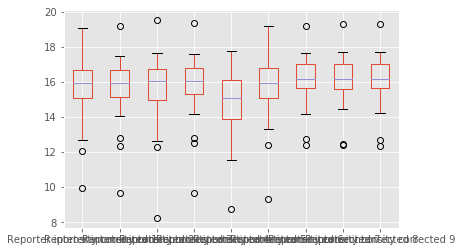

In [134]:
np.log2(temp.iloc[find_prot(temp['Proteins'], prot='Q9Z2H5')].iloc[:,0:9]).plot(kind='box')

In [132]:
temp.to_csv(path+'norm_pep.csv')